# Identifiability: Result Visulization
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
dataset_name = 'cora'  # change to the dataset you want to visualize
max_layer = 10

## Identifiability Rates

In [3]:
id_path = os.path.join(os.getcwd(), "../src/outputs/identifiability/embedding_id_rates_"+dataset_name+".csv")
id_df = pd.read_csv(id_path,index_col=0,header=0)
id_df

,1-layers GCN,2-layers GCN,3-layers GCN,4-layers GCN,5-layers GCN,6-layers GCN,7-layers GCN,8-layers GCN,9-layers GCN,10-layers GCN
1,0.299483,0.299114,0.296898,0.288405,0.290251,0.291359,0.276588,0.291728,0.285081,0.276219
2,0.000000,0.300591,0.303176,0.294313,0.291728,0.289513,0.278804,0.285820,0.286928,0.271787
3,0.000000,0.000000,0.300591,0.303545,0.295790,0.285451,0.279542,0.287666,0.288774,0.276219
4,0.000000,0.000000,0.000000,0.297637,0.295790,0.283604,0.284343,0.292097,0.281388,0.279911
5,0.000000,0.000000,0.000000,0.000000,0.296160,0.290620,0.288035,0.295421,0.288405,0.283604
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.291728,0.287297,0.298744,0.285081,0.279542
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292467,0.299114,0.285820,0.283235
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.294682,0.295421,0.276957
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290620,0.282496
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.282866


In [4]:
models = []
layers = []
id_rates = []

for i in np.arange(1, max_layer+1):
    model_name = str(i) + '-layers ' + 'GCN'
    for j in np.arange(i):
        models.append(model_name)
        layers.append(j+1)
        id_rates.append(id_df.loc[j+1,model_name])
        
id_line_df = pd.DataFrame({'identifiability rate': np.array(id_rates),
                           'model': models,
                          'layer': layers})

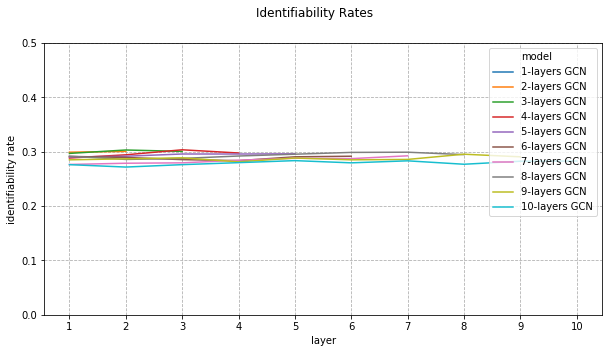

In [13]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Identifiability Rates')
plt.xticks(np.arange(1,max_layer+1,1))
plt.grid(ls='--')
plt.ylim(0,0.5)
sns.lineplot(data=id_line_df, x='layer', y='identifiability rate', hue="model")

## Repeating Rates

In [6]:
rr_path = os.path.join(os.getcwd(), "../src/outputs/identifiability/repeating_rates_"+dataset_name+".csv")
rr_df = pd.read_csv(rr_path,index_col=0,header=0)
rr_df

,1-layers GCN,2-layers GCN,3-layers GCN,4-layers GCN,5-layers GCN,6-layers GCN,7-layers GCN,8-layers GCN,9-layers GCN,10-layers GCN
1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.0,0.865432,0.919154,0.919334,0.924936,0.877060,0.905207,0.878481,0.936528,0.909091
3,0.0,0.000000,0.851990,0.918054,0.903308,0.858048,0.890521,0.864557,0.920984,0.917112
4,0.0,0.000000,0.000000,0.845070,0.860051,0.839037,0.907877,0.875949,0.914508,0.885027
5,0.0,0.000000,0.000000,0.000000,0.840967,0.830165,0.857143,0.862025,0.876943,0.878342
6,0.0,0.000000,0.000000,0.000000,0.000000,0.779468,0.837116,0.837975,0.865285,0.877005
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.826435,0.827848,0.865285,0.858289
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.822785,0.870466,0.827540
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.848446,0.831551
10,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.822193


In [7]:
models = []
layers = []
rr = []

for i in np.arange(1, max_layer+1):
    model_name = str(i) + '-layers ' + 'GCN'
    for j in np.arange(i):
        models.append(model_name)
        layers.append(j+1)
        rr.append(rr_df.loc[j+1,model_name])
        
rr_line_df = pd.DataFrame({'repeating rate': np.array(rr),
                           'model': models,
                          'layer': layers})

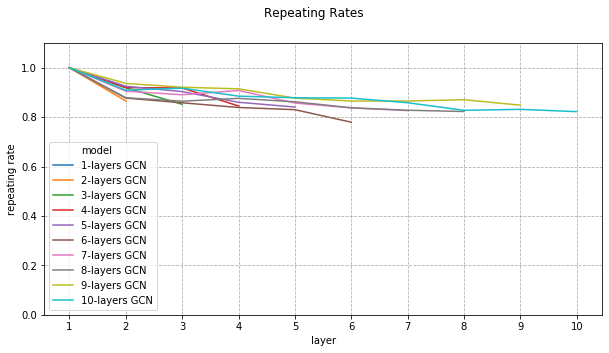

In [10]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Repeating Rates')
plt.xticks(np.arange(1,max_layer+1,1))
plt.grid(ls='--')
plt.ylim(0,1.1)
sns.lineplot(data=rr_line_df, x='layer', y='repeating rate', hue="model")

## Accuracy

In [14]:
acc_path = os.path.join(os.getcwd(), "../src/outputs/identifiability/accuracy_"+dataset_name+".csv")
acc_df = pd.read_csv(acc_path,index_col=0,header=0)
acc_df

,accuracy
1-layers GCN,0.566667
2-layers GCN,0.833333
3-layers GCN,0.803333
4-layers GCN,0.813333
5-layers GCN,0.750000
6-layers GCN,0.776667
7-layers GCN,0.666667
8-layers GCN,0.743333
9-layers GCN,0.663333
10-layers GCN,0.573333


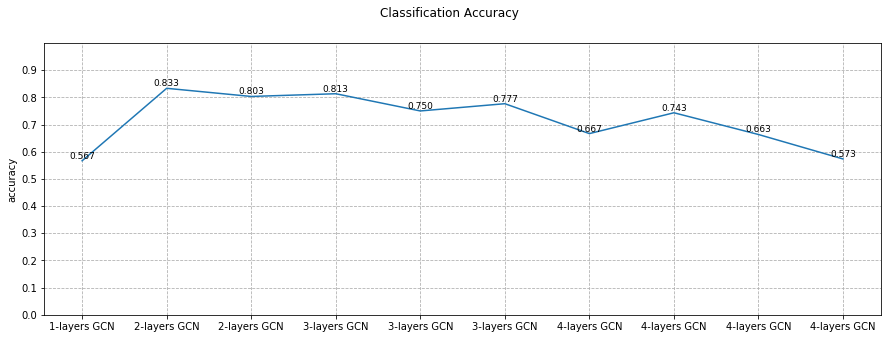

In [15]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Classification Accuracy')
plt.xticks(ticks=np.arange(0,max_layer+1,1),labels=models,rotation=0)
plt.yticks(np.arange(0,1,0.1))
plt.ylim(0,1)
plt.grid(ls='--')
sns.lineplot(x=np.arange(0,max_layer,1),y=acc_df['accuracy'])
for x,y in zip(np.arange(0,11),acc_df['accuracy']):
    plt.text(x, y+0.001, '%.3f' % y, ha='center', va= 'bottom',fontsize=9)

## Accuracy on identifiable nodes & unidentifiable nodes

In [16]:
acc_id_unid_path = os.path.join(os.getcwd(), "../src/outputs/identifiability/accuracy_id_unid_"+dataset_name+".csv")
acc_id_unid_df = pd.read_csv(acc_id_unid_path,index_col=0,header=0)
acc_id_unid_df

,accuracy on identifiable nodes,accuracy on unidentifiable nodes
1-layers GCN,0.446363,0.426463
2-layers GCN,0.788698,0.765048
3-layers GCN,0.761671,0.758712
4-layers GCN,0.758065,0.769716
5-layers GCN,0.674564,0.692550
6-layers GCN,0.687342,0.714807
7-layers GCN,0.529040,0.530793
8-layers GCN,0.647870,0.663874
9-layers GCN,0.570521,0.604373
10-layers GCN,0.459530,0.435118


In [17]:
models = []
id_unid = []
acc_id_unid = []

for i in np.arange(1, max_layer+1):
    model_name = str(i) + '-layers ' + 'GCN'
    for j in ['accuracy on identifiable nodes','accuracy on unidentifiable nodes']:
        models.append(model_name)
        id_unid.append(j)
        acc_id_unid.append(acc_id_unid_df.loc[model_name,j])
        
acc_id_unid_line_df = pd.DataFrame({'accuracy': np.array(acc_id_unid),
                           'model': models,
                          'identifiability': id_unid})

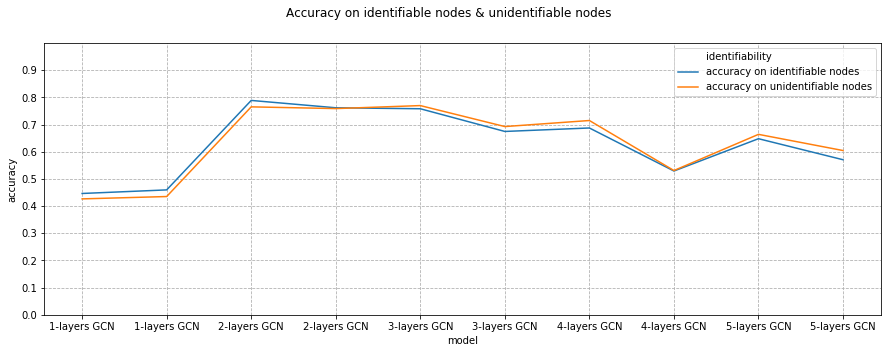

In [18]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Accuracy on identifiable nodes & unidentifiable nodes')
plt.xticks(ticks=np.arange(0,max_layer+1,1),labels=models,rotation=0)
plt.yticks(np.arange(0,1,0.1))
plt.ylim(0,1)
plt.grid(ls='--')
#sns.lineplot(x=np.arange(0,max_layer,1),y=acc_id_unid_df['accuracy on identifiable nodes'])
#sns.lineplot(x=np.arange(0,max_layer,1),y=acc_id_unid_df['accuracy on unidentifiable nodes'])
sns.lineplot(data=acc_id_unid_line_df,x='model',y='accuracy',hue='identifiability')